In [2]:
!pip install yfinance


[notice] A new release of pip available: 22.2 -> 22.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
%matplotlib inline
import sys
import pandas as pd
import numpy as np
import yfinance as yf


#getdata
c38u = yf.download("C38U.SI", start="2021-01-01", end="2022-10-05")

#compute log returns
c38u["log_return"] = np.log(c38u["Adj Close"] / c38u["Adj Close"].shift(1))

#add column for calendar day of month (1-31 & column for year)
c38u["day_of_month"] = c38u.index.day

c38u["year"] = c38u.index.year

[*********************100%***********************]  1 of 1 completed


In [5]:
import calendar
yy = 2022
mm = 10
print(calendar.month(yy,mm))

    October 2022
Mo Tu We Th Fr Sa Su
                1  2
 3  4  5  6  7  8  9
10 11 12 13 14 15 16
17 18 19 20 21 22 23
24 25 26 27 28 29 30
31



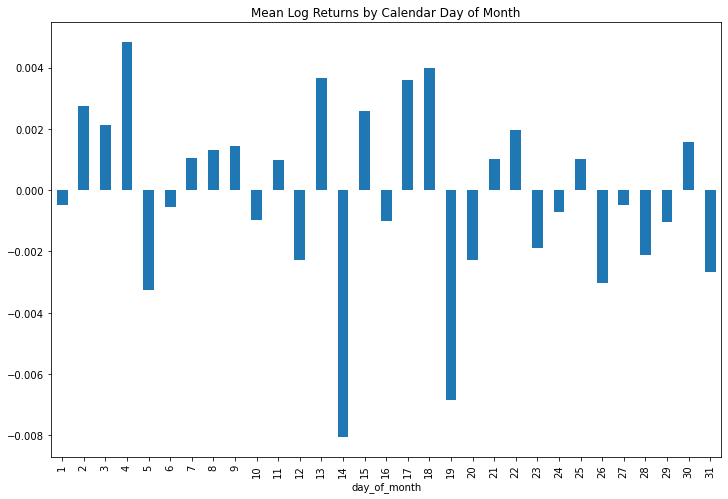

In [4]:
#testing Hypothesis
#mean return on every day of month

grouped_by_day = c38u.groupby("day_of_month").log_return.mean()
grouped_by_day.plot.bar(title="Mean Log Returns by Calendar Day of Month").figure.set_size_inches(12,8)

In [6]:
#naiive strat, buy and hold during last week of month
#short and hold during 1st week of month  || Long last week of month, Short 1st week

#first_week_returns - the daily log return if it’s between the 1st and 7th day of the month, otherwise 0
#last_week_returns - the daily log return if it's on or after the 23rd day of the month, otherwise 0
#last_week_less_first_week - the difference between last_week_returns and first_week_returns

c38u["first_week_returns"] = 0.0
c38u.loc[c38u.day_of_month <= 7, "first_week_returns"] = c38u[
    c38u.day_of_month <= 7
].log_return

c38u["last_week_returns"] = 0.0
c38u.loc[c38u.day_of_month >= 23, "last_week_returns"] = c38u[
    c38u.day_of_month >= 23
].log_return

c38u["last_week_less_first_week"] = c38u.last_week_returns - c38u.first_week_returns

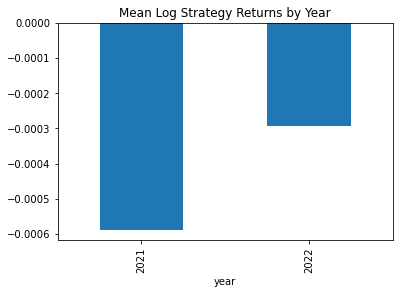

In [7]:
#plot returns
(
    c38u.groupby("year")
    .last_week_less_first_week.mean()
    .plot.bar(title="Mean Log Strategy Returns by Year")
)

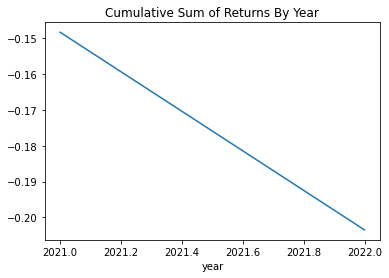

In [8]:
#cumulative returns by year
(
    c38u.groupby("year")
    .last_week_less_first_week.sum()
    .cumsum()
    .plot(title="Cumulative Sum of Returns By Year")
)

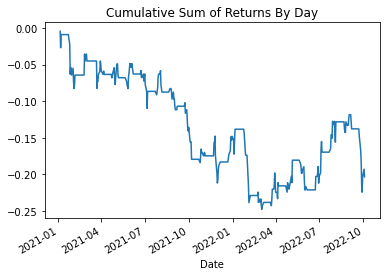

In [9]:
#cumulative returns by day
c38u.last_week_less_first_week.cumsum().plot(title="Cumulative Sum of Returns By Day")